# Network Intelligence for Counterterrorism: A 9/11 Case Study
by Esosa Orumwese

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [262]:
# Version used is '3.2.1'
nx.__version__

'3.2.1'

## Data Preparation

Let's see the network for the 9/11 terrorist group based on the information we got after the incident;

Data which contains 'full' network for the 9/11 attack is hosted on [SNAP's GitHub](https://github.com/maksim2042/SNABook/blob/master/chapter4)

In [2]:
import requests

# URLs of the text files on GitHub
url_edgelist = 'https://raw.githubusercontent.com/maksim2042/SNABook/master/chapter4/9_11_edgelist.txt'
url_attrib = 'https://raw.githubusercontent.com/maksim2042/SNABook/master/chapter4/9_11_attrib.txt'

# Function to download a file given its URL
def download_file(url, filename):
      response = requests.get(url)
      if response.status_code == 200:
            with open(filename, 'wb') as f:
                  f.write(response.content)
            print(f"File '{filename}' downloaded successfully.")
      else:
            print(f"Failed to download file from '{url}'.")

# Download the edgelist.txt file
download_file(url_edgelist, './data/full_9_11_edgelist.txt')

# Download the attrib.txt file
download_file(url_attrib, './data/full_9_11_attrib.txt')


File './data/full_9_11_edgelist.txt' downloaded successfully.
File './data/full_9_11_attrib.txt' downloaded successfully.


Now let's prepare the edge list for the dataset which contains information that authorities had or could have obtained prior to the incident. Data is gotten from [here](https://sites.google.com/site/ucinetsoftware/datasets/covert-networks/911-hijackers).

Based on Lindelauf et al., 2011, weights which represented the importance of each node based on some descriptors were manually added to the attributes file.

In [3]:
# Read the data matrix (prior contacts) and attributes into DataFrames
data_matrix_file = './data/9_11_HIJACKERS_PRIORCONTACTS.csv'
attributes_file = './data/9_11_HIJACKERS_edited_ATTR.csv'

data_matrix = pd.read_csv(data_matrix_file, index_col=0)
attributes = pd.read_csv(attributes_file, index_col=0)


In [4]:
data_matrix

,Satam Suqami,Wail Alshehri,Majed Moqed,Waleed Alshehri,Salem Alhazmi*,Khalid Al-Mihdhar,Hani Hanjour,Abdul Aziz Al-Omari*,Ahmed Alghamdi,Ahmed Alnami,Mohamed Atta,Marwan Al-Shehhi,Fayez Ahmed,Nawaf Alhazmi,Ziad Jarrah,Mohand Alshehri*,Saeed Alghamdi*,Ahmed Al Haznawi,Hamza Alghamdi
Satam Suqami,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Wail Alshehri,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Majed Moqed,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
Waleed Alshehri,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
Salem Alhazmi*,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
Khalid Al-Mihdhar,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
Hani Hanjour,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
Abdul Aziz Al-Omari*,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
Ahmed Alghamdi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Ahmed Alnami,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


Although the matrix is okay, I'd have to include in some edges which I couldn't figure out what informed the relationship. The plot is from figure 3 in this [paper](https://firstmonday.org/ojs/index.php/fm/article/view/941/863)

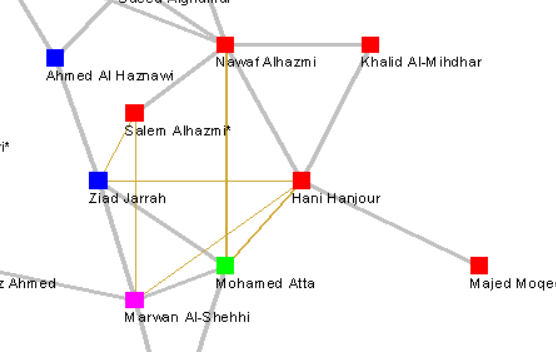

In [5]:
data_matrix.index

Index(['Satam Suqami', 'Wail Alshehri', 'Majed Moqed', 'Waleed Alshehri',
       'Salem Alhazmi*', 'Khalid Al-Mihdhar', 'Hani Hanjour',
       'Abdul Aziz Al-Omari*', 'Ahmed Alghamdi', 'Ahmed Alnami',
       'Mohamed Atta', 'Marwan Al-Shehhi', 'Fayez Ahmed', 'Nawaf Alhazmi',
       'Ziad Jarrah', 'Mohand Alshehri*', 'Saeed Alghamdi*',
       'Ahmed Al Haznawi', 'Hamza Alghamdi'],
      dtype='object')

In [6]:
data_matrix.loc['Salem Alhazmi*', 'Ziad Jarrah'] = 1
data_matrix.loc['Ziad Jarrah', 'Salem Alhazmi*'] = 1
data_matrix.loc['Salem Alhazmi*', 'Marwan Al-Shehhi'] = 1
data_matrix.loc['Marwan Al-Shehhi', 'Salem Alhazmi*'] = 1

data_matrix.loc['Marwan Al-Shehhi', 'Hani Hanjour'] = 1
data_matrix.loc['Hani Hanjour', 'Marwan Al-Shehhi'] = 1
data_matrix.loc['Mohamed Atta', 'Hani Hanjour'] = 1
data_matrix.loc['Hani Hanjour', 'Mohamed Atta'] = 1
data_matrix.loc['Hani Hanjour', 'Ziad Jarrah'] = 1
data_matrix.loc['Ziad Jarrah', 'Hani Hanjour'] = 1

data_matrix.loc['Mohamed Atta', 'Nawaf Alhazmi'] = 1
data_matrix.loc['Nawaf Alhazmi', 'Mohamed Atta'] = 1

Below is the code for the attributes file

Network Strength: 
* 1 = Trusted Prior Contacts
* 2 = Other Associates

Ties:
* 1 = AA #11 WTC North
* 2 = AA #77 Pentagon
* 3 = UA #93 Pennsylvania
* 4 = UA #175 WTC South
* 5 = Other Associates

Weights:

This calculated based on Lindelauf et al., 2011 [1] method. However, it represents the importance of each node based off the known information before the incident.

In [7]:
attributes

,Network Strength,Ties,Weights
Majed Moqed,1,2,1
Khalid Al-Mihdhar,1,2,3
Hani Hanjour,1,2,1
Nawaf Alhazmi,1,2,2
Salem Alhazmi*,1,2,1
...,...,...,...
Takek Maaroufi,2,5,0
Fahid al Shakri,2,5,0
Madjid Sahoune,2,5,0
Samir Kishk,2,5,0


Nodes with a value of 0 need to be removed as they are the associates which were found after investigation. The would have a network strength of 2, a tie of 5 and a weight of 0.

In [8]:
attributes.query('Weights == 0')

,Network Strength,Ties,Weights
Raed Hijazi,2,5,0
Nabil al-Marabh,2,5,0
Mustafa Ahamend al-Hisawi,2,5,0
Mamoun Darkazanli,2,5,0
Zakariya Essabar,2,5,0
Said Bahaji,2,5,0
Mounir El Motassadeq,2,5,0
Zacarias Moussaoui,2,5,0
Ramzi Bin al-Shibh,2,5,0
Agus Budiman,2,5,0


In [9]:
attributes = attributes.query('Weights != 0')

In [10]:
attributes

,Network Strength,Ties,Weights
Majed Moqed,1,2,1
Khalid Al-Mihdhar,1,2,3
Hani Hanjour,1,2,1
Nawaf Alhazmi,1,2,2
Salem Alhazmi*,1,2,1
Ahmed Alnami,1,3,1
Ahmed Alghamdi,1,4,1
Saeed Alghamdi*,1,3,1
Hamza Alghamdi,1,4,1
Ahmed Al Haznawi,1,3,1


Replace the numbers in `Ties` to represent `Flight` and drop `Network Strength`

In [11]:
map_flight = {1: 'AA_11_WTC_North',
              2: 'AA_77_Pentagon',
              3: 'UA_93_Pennsylvania',
              4: 'UA_175_WTC_South'}

attributes = attributes.rename(columns={'Ties':'Flight'})
attributes['Flight'] = attributes['Flight'].map(map_flight)
attributes = attributes.drop('Network Strength', axis=1)

In [12]:
attributes

,Flight,Weights
Majed Moqed,AA_77_Pentagon,1
Khalid Al-Mihdhar,AA_77_Pentagon,3
Hani Hanjour,AA_77_Pentagon,1
Nawaf Alhazmi,AA_77_Pentagon,2
Salem Alhazmi*,AA_77_Pentagon,1
Ahmed Alnami,UA_93_Pennsylvania,1
Ahmed Alghamdi,UA_175_WTC_South,1
Saeed Alghamdi*,UA_93_Pennsylvania,1
Hamza Alghamdi,UA_175_WTC_South,1
Ahmed Al Haznawi,UA_93_Pennsylvania,1


In [13]:
attributes.shape

(19, 2)

In [14]:
data_matrix.shape

(19, 19)

In [15]:
data_matrix.stack().reset_index()

,level_0,level_1,0
0,Satam Suqami,Satam Suqami,0
1,Satam Suqami,Wail Alshehri,1
2,Satam Suqami,Majed Moqed,0
3,Satam Suqami,Waleed Alshehri,1
4,Satam Suqami,Salem Alhazmi*,0
...,...,...,...
356,Hamza Alghamdi,Ziad Jarrah,0
357,Hamza Alghamdi,Mohand Alshehri*,1
358,Hamza Alghamdi,Saeed Alghamdi*,1
359,Hamza Alghamdi,Ahmed Al Haznawi,1


We need to remove the rows that aren't connected i.e. they have a value of 0.

In [16]:
set(data_matrix.stack().reset_index()[0])

{0, 1}

In [17]:
# Reshape the data matrix to have source and target columns
data_matrix = data_matrix.stack().reset_index()
data_matrix.columns = ['Source', 'Target', 'Connected']
data_matrix['Connected'] = data_matrix['Connected'].astype(int)

# remove rows without connections
data_matrix = data_matrix.query("Connected == 1")

In [18]:
data_matrix.shape

(60, 3)

In [19]:
# Write the edge list to a file
data_matrix.to_csv('./data/before_9_11_edgelist.txt', index=False, header=False)
attributes.to_csv('./data/before_9_11_attrib.txt', index=True, header=False)

## Network Visualization
#### After the incident (with the 'full' network known)

In [20]:
import csv
from collections import defaultdict

The data for this case is supplied in a format resembling the following:

```
Hani Hanjour,Majed Moqed,5,1
Hani Hanjour,Nawaf Alhazmi,5,1
Hani Hanjour,Khalid Al-Mihdhar,5,1
Hani Hanjour,Lotfi Raissi,5,1
Hani Hanjour,Bandar Alhazmi,5,1
Hani Hanjour,Rayed Mohammed Abdullah,5,1
...
```

What those values mean;
* the first column is the name of the "**from**" node, 
* the second column is the name of the "**to**" node,
* the following two numbers signify;
   * the **strength of tie** (5=strong tie, 1=weak tie); and
   * the **level** *to which the tie has been* **verified** (1=confirmed close contact, 2=various recorded interactions, 3=potential/planned/unconfirmed interactions)

In [21]:
# read the edge list from the text file
g = nx.Graph()
with open('./data/full_9_11_edgelist.txt', 'r') as file:
      in_file = csv.reader(file)
      for line in in_file:
            g.add_edge(line[0], line[1], weight=int(line[2]), conf=int(line[3]))

In [22]:
# Read the attribute file and assign 'flight' attribute to nodes
for n in g.nodes:
      # let's make sure that all nodes in the graph have the 'flight' attribute
      g.nodes[n]['flight'] = 'Associates'

with open('./data/full_9_11_attrib.txt', 'r') as attrb:
      attrb_reader = csv.reader(attrb)
      for line in attrb_reader:
            # assign 'flight' attribute to nodes based on the attribute file
            g.nodes[line[0]]['flight'] = line[1]

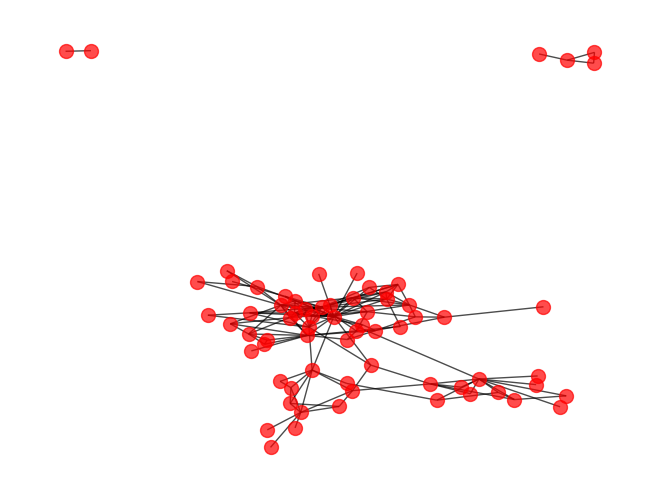

In [23]:
pos = nx.spring_layout(g)
nx.draw(g, pos, with_labels=False, node_size=100, node_color='red', edge_color='black', alpha=0.7)

As we can see in the graph above, the network consists of several disconnected components. However, we'll only need to look at the largest one.

In [24]:
# extract the largest connected component
cc = max(nx.connected_components(g), key=len)
largest_connected_component = g.subgraph(cc)

Defining a custom plotting function

In [158]:
def abbreviate_name(name):
    parts = name.split()
    if len(parts) > 1:
        abbreviated_parts = [f"{part[0]}." for part in parts[:-1]]
        abbreviated_name = "".join(abbreviated_parts + [parts[-1]])
        return abbreviated_name
    else:
        return name

def plot_multimode(m, node_ratio=1, layout=nx.spring_layout, type_string='type', plot_title='', fntsize=12, label_abbrev=False, figsize=(20,14)):
      colors = ['r','g','b','c','m','y','k']
      colormap = {}
      d = nx.degree(m)
      pos = layout(m)
      nodesets = defaultdict(list)

      for n in m.nodes():
            # group nodes based on the 'type_string' attribute
            t = m.nodes[n][type_string]
            nodesets[t].append(n)

      plt.figure(figsize=figsize)
      #plt.figure(figsize=(10,8))

      i=0
      for key in nodesets.keys():
            ns = np.array([d[n] * 100 for n in nodesets[key]])
            # draw nodes with different colors based on groups. Node ratio just proportionally reduces
            # or increases the node size
            nx.draw_networkx_nodes(m, pos, nodelist=nodesets[key], node_size=node_ratio*ns,
                                   node_color=colors[i], alpha=0.6, label=key)
            colormap[key]=colors[i]
            i+=1
            if i == len(colors):
                  i=0

      # draw edges using default settings
      nodelist = list(m.nodes)

      if label_abbrev:
           labels = {name: abbreviate_name(name) for name in nodelist}
      else:
           labels = {name: name for name in nodelist}
      
      
      nx.draw_networkx_edges(m, pos, width=0.5, alpha=0.8) # alpha was set to 0.5 initially
      nx.draw_networkx_labels(m, pos, labels, font_size=8)
      plt.axis('off')

      # create legend
      handles = [plt.Rectangle((0,0),1,1, color=colormap[key]) for key in nodesets.keys()]
      plt.legend(handles, nodesets.keys(), loc='lower left')

      # save or display the plot
      if plot_title:
            plt.title(label = plot_title, fontsize=fntsize)
      plt.show()

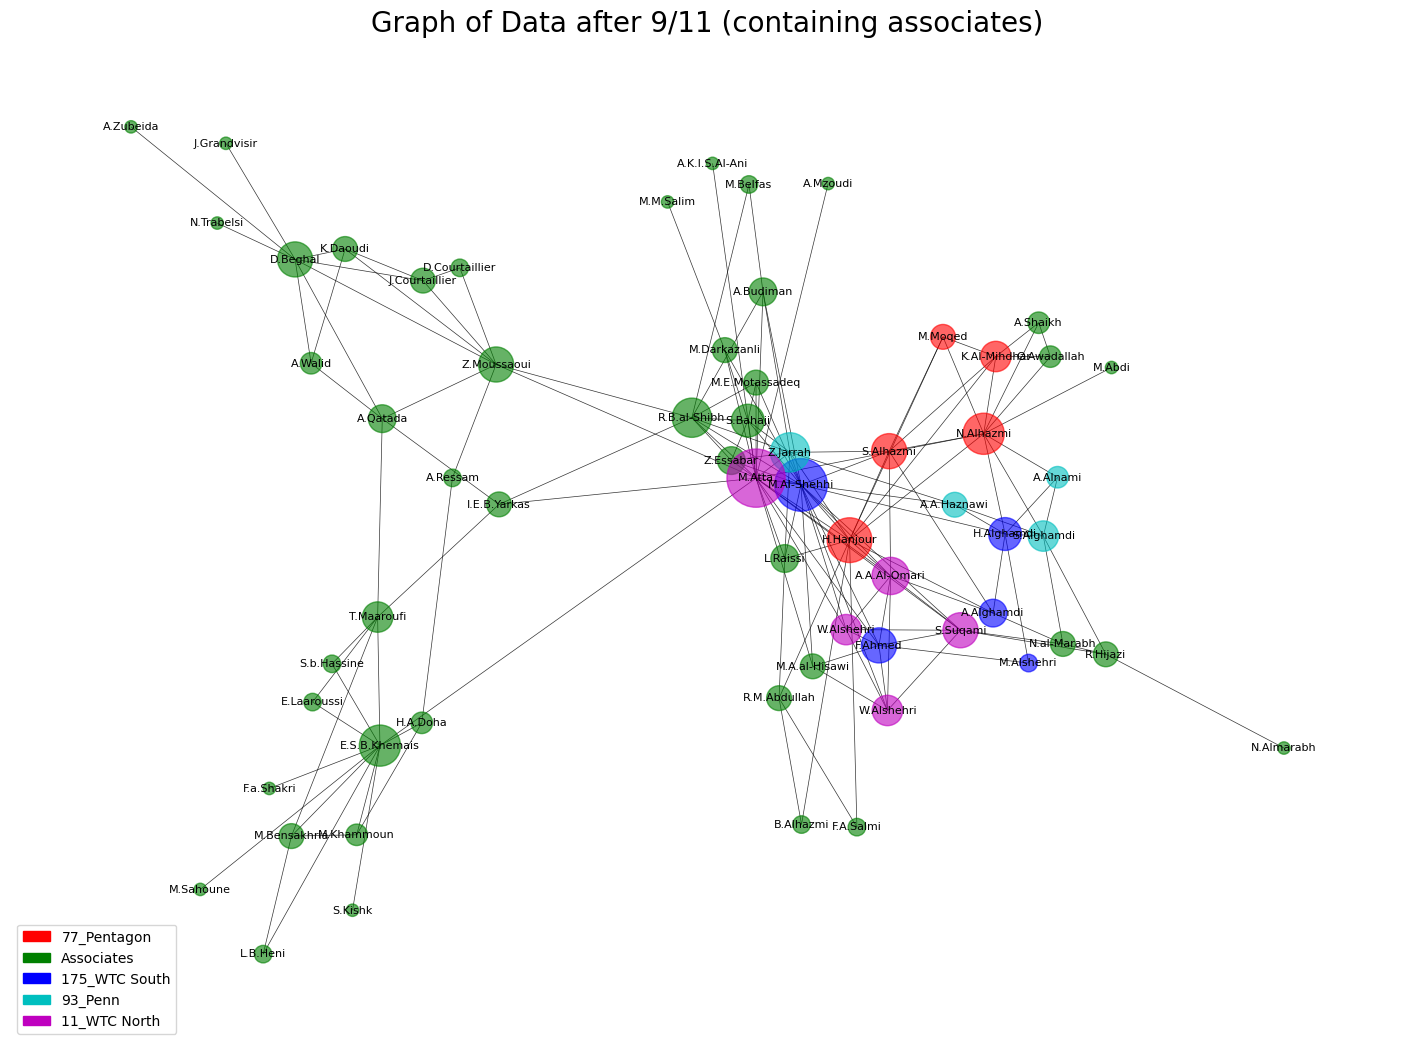

In [192]:
title = 'Graph of Data after 9/11 (containing associates)'
plot_multimode(largest_connected_component, type_string='flight', plot_title=title, fntsize=20, label_abbrev=True, node_ratio=0.8, figsize=(18,13))

# maybe calculate the standard centrality values for these

Now plot for the 'before' network

In [27]:
# read the edge list from the text file
g = nx.Graph()
with open('./data/before_9_11_edgelist.txt', 'r') as file:
      in_file = csv.reader(file)
      for line in in_file:
            g.add_edge(line[0], line[1])

In [28]:
with open('./data/before_9_11_attrib.txt', 'r') as attrb:
      attrb_reader = csv.reader(attrb)
      for line in attrb_reader:
            # assign 'flight' attribute to nodes based on the attribute file
            g.nodes[line[0]]['flight'] = line[1]
            g.nodes[line[0]]['weight'] = int(line[2])

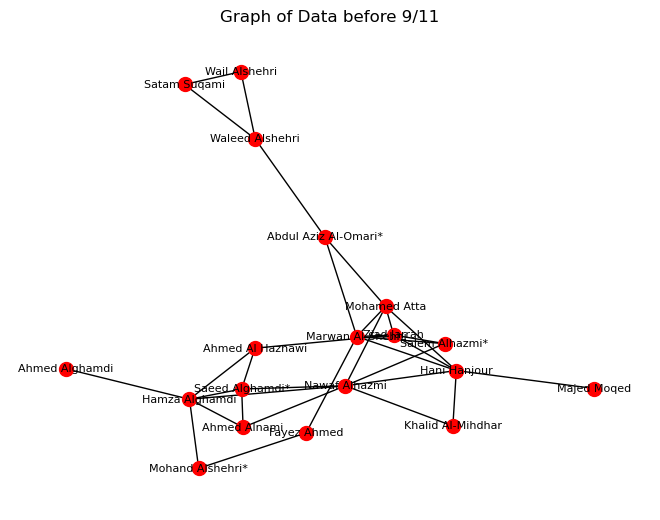

In [29]:
pos = nx.spring_layout(g)
nx.draw(g, pos, with_labels=True, font_size=8, node_size=100, node_color='red', edge_color='black')#, alpha=0.7)
plt.title('Graph of Data before 9/11');

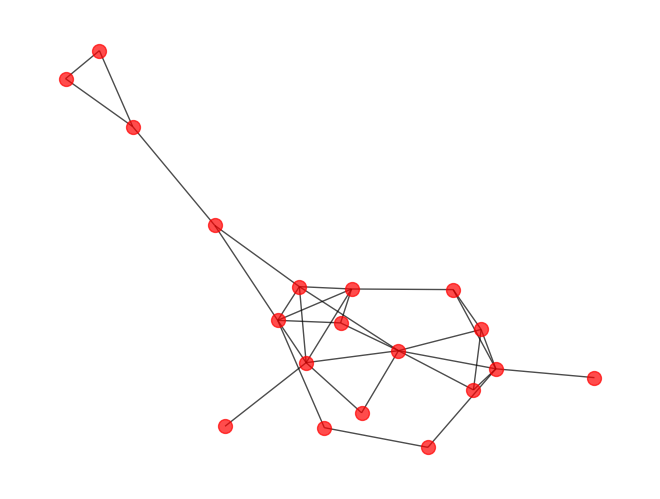

In [30]:
pos = nx.spring_layout(g)
nx.draw(g, pos, with_labels=False, node_size=100, node_color='red', edge_color='black', alpha=0.7)

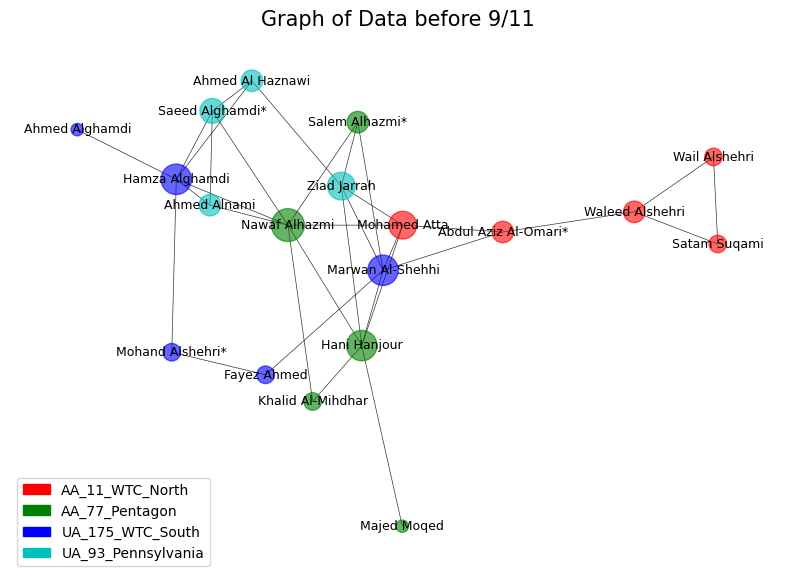

In [113]:
title = 'Graph of Data before 9/11'
plot_multimode(g, type_string='flight', plot_title=title, fntsize=15, node_ratio=0.8, figsize=(10,7))

## Analysis

Let's build the algorithm for our game theoretic centrality.
* We need to have a network with $N$ players and each player with a weight
* Get all possible coalitions (subgraphs) in that network i.e. $S\subseteq{N}$ this means the coalitions would range from 1 individual to $N$ individuals (which is the whole network).
* Calculate the value of each coalition, $v^{wconn}(S)$

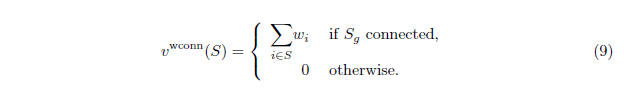

* Now to get the contribution of each player to the coalition, you have to calculate the following for every coalition that doesn't include that player.

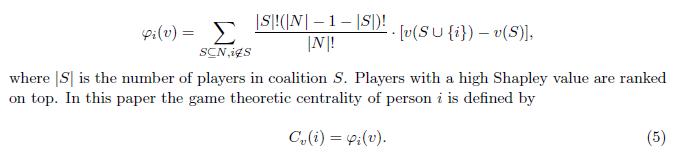

In [32]:
g.nodes['Mohamed Atta']

{'flight': 'AA_11_WTC_North', 'weight': 4}

Let's find all possible coalitions by making all possible subgraphs

In [33]:
# Get the list of nodes in your graph
nodes = list(g.nodes())

In [34]:
nodes

['Satam Suqami',
 'Wail Alshehri',
 'Waleed Alshehri',
 'Majed Moqed',
 'Hani Hanjour',
 'Abdul Aziz Al-Omari*',
 'Salem Alhazmi*',
 'Marwan Al-Shehhi',
 'Nawaf Alhazmi',
 'Ziad Jarrah',
 'Khalid Al-Mihdhar',
 'Mohamed Atta',
 'Ahmed Alghamdi',
 'Hamza Alghamdi',
 'Ahmed Alnami',
 'Saeed Alghamdi*',
 'Fayez Ahmed',
 'Mohand Alshehri*',
 'Ahmed Al Haznawi']

Let's calculate the total number of subgraph combinations for 19 nodes using the formula provided:

$$
\text{Total combinations} = \sum_{k=1}^{19} \binom{19}{k}
$$

*where k ranges from 1 to 19 nodes*

In [35]:
import math

ncr = []
for _ in np.arange(1,20):
      ncr.append(math.comb(19,_))

np.sum(ncr)

524287

So, there would be 524,287 possible subgraph combinations for a network with 19 nodes. This would be used to confirm that we have obtained the right number of coalitions (subgraphs)

In [36]:
nodes

['Satam Suqami',
 'Wail Alshehri',
 'Waleed Alshehri',
 'Majed Moqed',
 'Hani Hanjour',
 'Abdul Aziz Al-Omari*',
 'Salem Alhazmi*',
 'Marwan Al-Shehhi',
 'Nawaf Alhazmi',
 'Ziad Jarrah',
 'Khalid Al-Mihdhar',
 'Mohamed Atta',
 'Ahmed Alghamdi',
 'Hamza Alghamdi',
 'Ahmed Alnami',
 'Saeed Alghamdi*',
 'Fayez Ahmed',
 'Mohand Alshehri*',
 'Ahmed Al Haznawi']

In [37]:
import itertools

# define the number of nodes in the network
num_nodes = len(nodes)

# Generate all possible combinations of nodes
nodes_comb = []
for r in range(1, num_nodes + 1):
      indices = list(itertools.combinations(range(num_nodes), r))
      for idx in indices:
            nodes_comb.append([nodes[i] for i in idx])


In [38]:
# Print the total number of subgraph combinations
total_combinations = len(nodes_comb)
print("Total number of subgraph combinations:", total_combinations)

Total number of subgraph combinations: 524287


Now let's get the actual subgraphs

In [39]:
# Initialize a list to store all possible subgraphs
subgraphs = np.array([None]*total_combinations)

# Generate all possible subgraphs
c=0
for sub_node in nodes_comb:
      subgraph = g.subgraph(sub_node)
      subgraphs[c] = subgraph
      c+=1      

In [40]:
len(subgraphs)

524287

Visualizing the exponential increase of subgraphs with the number of nodes in a network.

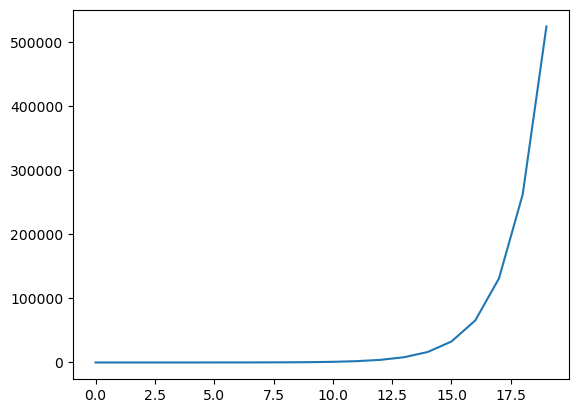

In [261]:
def funci(node):
      ncr = []
      for _ in np.arange(1,node+1):
            ncr.append(math.comb(node,_))

      return np.sum(ncr)

nd_list = np.arange(0,20,1)
poss_cols = [funci(nd) for nd in nd_list]

plt.plot(nd_list, poss_cols);

We have the right number of subgraphs. Now to confirm that the attributes were also copied

In [41]:
list(subgraphs[5555].nodes.data())

[('Ziad Jarrah', {'flight': 'UA_93_Pennsylvania', 'weight': 4}),
 ('Satam Suqami', {'flight': 'AA_11_WTC_North', 'weight': 1}),
 ('Nawaf Alhazmi', {'flight': 'AA_77_Pentagon', 'weight': 2}),
 ('Wail Alshehri', {'flight': 'AA_11_WTC_North', 'weight': 1}),
 ('Saeed Alghamdi*', {'flight': 'UA_93_Pennsylvania', 'weight': 1})]

Next, we need to find out if the nodes are fully connected in order for it to be a coalition

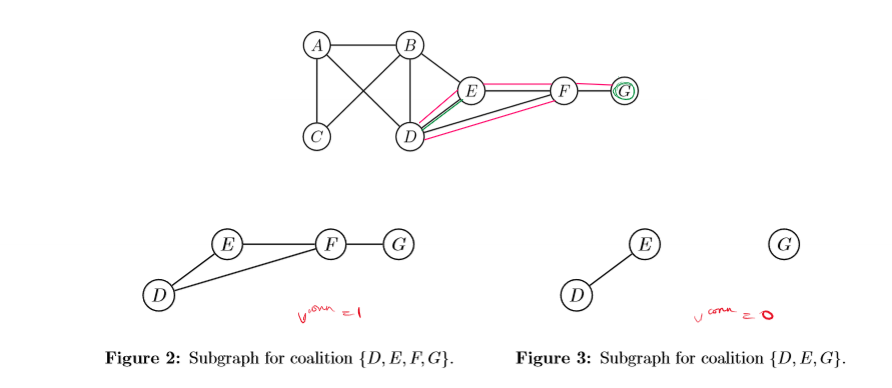

A coalition doesn't necessary need all elements to be connected to each other. It just needs to be a fully connected subgraph

In [42]:
def is_coalition(g):
      '''Finds out if an undirected graph, g, is fully connected or not.
      Returns True or False'''
      num_nodes = len(g.nodes)

      if num_nodes == 1:
            # it is not a coalition if it just contains one node
            return False

      if nx.is_connected(g):
            return True
      else:
            return False

In [43]:
# get some connected subgraphs to visualize
c=0
for i in range(len(subgraphs)):
      if is_coalition(subgraphs[i]):
            if len(subgraphs[i].nodes) > 11:
                  print(i)
                  c+=1
                  if c == 15:
                        break

430103
430105
430106
430107
430108
430110
430112
430113
430114
430115
430117
430118
430124
430125
430126


In [44]:
is_coalition(subgraphs[430118])

True

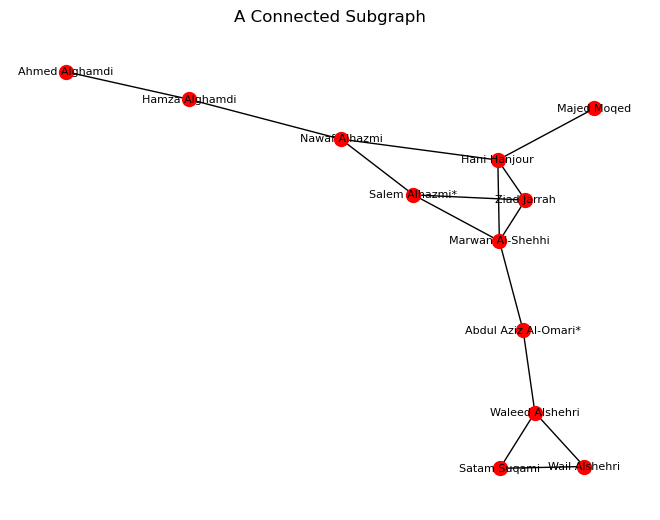

In [45]:
pos = nx.spring_layout(subgraphs[430118])
nx.draw(subgraphs[430118], pos, with_labels=True, font_size=8, node_size=100, node_color='red', edge_color='black')#, alpha=0.7)
plt.title('A Connected Subgraph');

In [46]:
# get some non-connected subgraphs to visualize
c=0
for i in range(len(subgraphs)):
      if not(is_coalition(subgraphs[i])):
            if len(subgraphs[i].nodes) > 11:
                  print(i)
                  c+=1
                  if c == 15:
                        break

430104
430109
430111
430116
430119
430120
430121
430122
430123
430131
430134
430138
430139
430144
430145


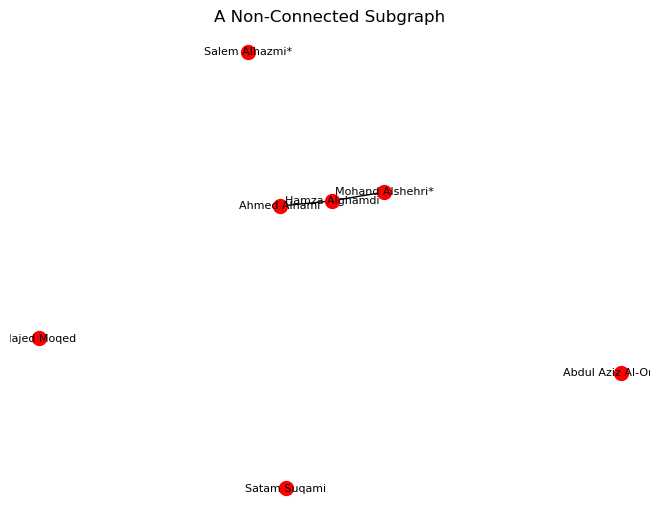

In [47]:
pos = nx.spring_layout(subgraphs[55554])
nx.draw(subgraphs[55554], pos, with_labels=True, font_size=8, node_size=100, node_color='red', edge_color='black')#, alpha=0.7)
plt.title('A Non-Connected Subgraph');

In [48]:
dict(subgraphs[55554].nodes.data())

{'Majed Moqed': {'flight': 'AA_77_Pentagon', 'weight': 1},
 'Salem Alhazmi*': {'flight': 'AA_77_Pentagon', 'weight': 1},
 'Abdul Aziz Al-Omari*': {'flight': 'AA_11_WTC_North', 'weight': 1},
 'Hamza Alghamdi': {'flight': 'UA_175_WTC_South', 'weight': 1},
 'Mohand Alshehri*': {'flight': 'UA_175_WTC_South', 'weight': 1},
 'Ahmed Alnami': {'flight': 'UA_93_Pennsylvania', 'weight': 1},
 'Satam Suqami': {'flight': 'AA_11_WTC_North', 'weight': 1}}

In [49]:
x = subgraphs[55554].nodes
y = dict(subgraphs[55554].nodes.data())
y[list(x)[1]]['weight']

1

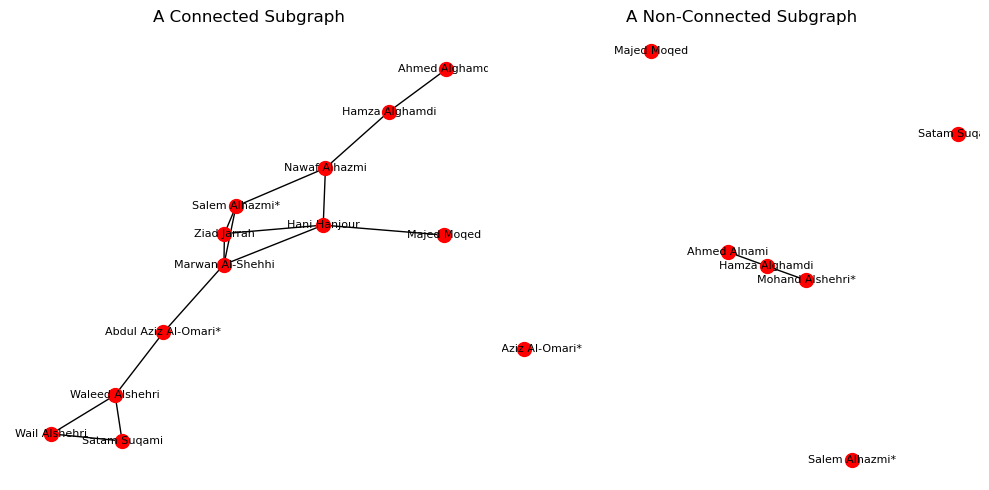

In [238]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

pos = nx.spring_layout(subgraphs[430118])
nx.draw(subgraphs[430118], pos, ax=axs[0], with_labels=True, font_size=8, node_size=100, node_color='red', edge_color='black')
axs[0].set_title('A Connected Subgraph')

pos = nx.spring_layout(subgraphs[55554])
nx.draw(subgraphs[55554], pos, ax=axs[1], with_labels=True, font_size=8, node_size=100, node_color='red', edge_color='black')
axs[1].set_title('A Non-Connected Subgraph')

plt.tight_layout()
plt.show()

Let's calculate the $v^{wconn}$ for each coalition

In [50]:
def coalition_value(g):
      '''Gets the value of each fully connected weighted coalition'''
      # return 0 if network is not connected
      if not(is_coalition(g)):
            return 0

      # list of nodes and data dictionary
      nodes = list(g.nodes)
      data = dict(g.nodes.data())

      weights = []
      for n in nodes:
            weights.append(data[n]['weight'])
      
      return sum(weights)

In [51]:
coalition_value(subgraphs[55554])

0

How essential are the following two cells?

In [52]:
# # empty list to hold values of each coalition. Initialized with 0's
# subgraphs_weights = np.zeros(len(subgraphs), dtype=np.int32)

# # get coalitions which are connected
# connected_idx = []
# for i in range(len(subgraphs)):
#       if is_coalition(subgraphs[i]):
#             connected_idx.append(i)

# # get the value of each coalition
# for idx in connected_idx:
#       subgraphs_weights[idx] = coalition_value(subgraphs[idx])


In [53]:
# subgraphs_weights

Coalitions with 0 values either aren't fully connected or have just one node.

Next we need to implement function for calculating the Shapley value for each node, $\varphi_i(v)$

You only take into consideration the coalitions that the player isn't a part of 

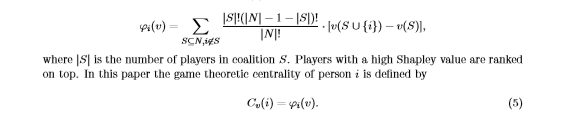
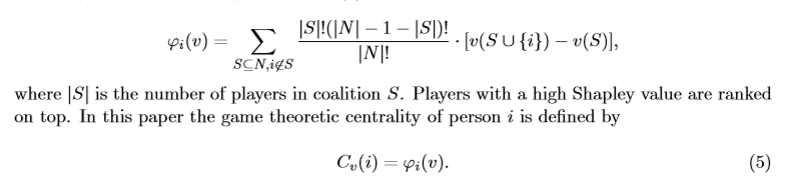

In [54]:
# define a function that finds the graphs where a specific node isn't in it. It should take in a player 
# and then return the coalitions that it is not part of.
def coalitions_notwith_node(node, G):
      '''
      Takes a node together with the main graph (one which contains the subgraphs) and returns indexes of the main graph
      which don't contain that particular node.
      '''
      indexes = []
      i=0
      for g in G:
            if not(g.__contains__(node)):
                  indexes.append(i)
            i+=1

      return indexes

# next we need a function that adds a node into the networks that don't contain it
def add_player_to_network(node_attr, G, neighbors):
      '''
      Adds player to subset of subgraphs which don't contain the player
      node_attr: a list containing the node and its attributes
      neighbors: a list of the node's neighbours in the main network
      '''
      # Create a list to store modified subgraphs
      modified_subgraphs = []
      node, attr = node_attr[0], node_attr[1]

      for g in G:
            # Create a new graph based on the current subgraph
            modified_g = g.copy()

            # add the node with its attributes to the mod subgraph
            modified_g.add_node(node, **attr)
            
            # Add edges between the node and its neighbors, if any, according 
            # to the main graph.
            curr_nodes = list(modified_g.nodes())
            for n in curr_nodes:
                  if n == node:
                        continue
                  if n in neighbors:
                        modified_g.add_edge(node, n)

                  
            # Append the modified subgraph to the list
            modified_subgraphs.append(modified_g)
      return modified_subgraphs

def calc_shapley_value_per_node(node_attr, neighbors, G, N):
      '''
      Calculate the Shapley value for a particular node.
      node_attr: a list containing the node and its attributes
      neighbors: a list of the node's neighbours in the main network
      G: list of subgraphs that don't contain that particular node.
      N: Is the total number of nodes in the original network
      '''
      vals = []
      # let's get the modified graphs
      H = add_player_to_network(node_attr, G, neighbors) # S U {i}

      i = 0
      for coalition in G:
            S = len(coalition.nodes)
            A = math.factorial(S) * math.factorial(N-1-S)
            B = math.factorial(N)
            C = coalition_value(H[i]) - coalition_value(coalition)
            val = (A/B) * C
            vals.append(val)
            i+=1
      
      return np.sum(vals)

Let's get the Shapley value for each node in the network

In [55]:
list(g.nodes.data())

[('Satam Suqami', {'flight': 'AA_11_WTC_North', 'weight': 1}),
 ('Wail Alshehri', {'flight': 'AA_11_WTC_North', 'weight': 1}),
 ('Waleed Alshehri', {'flight': 'AA_11_WTC_North', 'weight': 1}),
 ('Majed Moqed', {'flight': 'AA_77_Pentagon', 'weight': 1}),
 ('Hani Hanjour', {'flight': 'AA_77_Pentagon', 'weight': 1}),
 ('Abdul Aziz Al-Omari*', {'flight': 'AA_11_WTC_North', 'weight': 1}),
 ('Salem Alhazmi*', {'flight': 'AA_77_Pentagon', 'weight': 1}),
 ('Marwan Al-Shehhi', {'flight': 'UA_175_WTC_South', 'weight': 3}),
 ('Nawaf Alhazmi', {'flight': 'AA_77_Pentagon', 'weight': 2}),
 ('Ziad Jarrah', {'flight': 'UA_93_Pennsylvania', 'weight': 4}),
 ('Khalid Al-Mihdhar', {'flight': 'AA_77_Pentagon', 'weight': 3}),
 ('Mohamed Atta', {'flight': 'AA_11_WTC_North', 'weight': 4}),
 ('Ahmed Alghamdi', {'flight': 'UA_175_WTC_South', 'weight': 1}),
 ('Hamza Alghamdi', {'flight': 'UA_175_WTC_South', 'weight': 1}),
 ('Ahmed Alnami', {'flight': 'UA_93_Pennsylvania', 'weight': 1}),
 ('Saeed Alghamdi*', {'fl

In [56]:
# I want to make use of a progress bar since we're working with a lot of 
# coalitions
from sklearn import neighbors
from tqdm import tqdm

def game_theoretic_centrality(g, subgraphs):
      '''Calculate the game theoretic centrality using Shapley values for each node in the network'''
      # empty dictionary to contain the values
      centrality_dict = dict.fromkeys(g.nodes)
      # list to contain the nodes and their respective attributes
      nodes_attrs = list(g.nodes.data())
      N = len(g.nodes)

      i=0
      #for node in g.nodes:
      for i, node in enumerate(tqdm(g.nodes, desc="Calculating centrality")):
            # get the subgraphs that don't include that node
            notIn_idx = coalitions_notwith_node(node, subgraphs)
            notIn_subgraphs = [subgraphs[n] for n in notIn_idx]

            # calc the shapely value for that node given the prev sub graphs
            if nodes_attrs[i][0] != node: # to ensure that they're the same thing
                  print(f'Node {i} not the same as node_attr')
                  break
            neighbors = list(g.neighbors(node))
            val = calc_shapley_value_per_node(nodes_attrs[i], neighbors, notIn_subgraphs, N)
            centrality_dict[node] = val
            i+=1
            
      return centrality_dict 


In [57]:
nodes_game_dict = game_theoretic_centrality(g, subgraphs)

Calculating centrality: 100%|██████████| 19/19 [11:45<00:00, 37.12s/it]


In [58]:
nodes_game_dict

{'Satam Suqami': -0.36899205455707007,
 'Wail Alshehri': -0.36899205455707007,
 'Waleed Alshehri': 5.562228767104927,
 'Majed Moqed': -0.691127517133709,
 'Hani Hanjour': 5.4026111788108695,
 'Abdul Aziz Al-Omari*': 6.0957015851365695,
 'Salem Alhazmi*': 0.280358921264494,
 'Marwan Al-Shehhi': 2.2025600861127175,
 'Nawaf Alhazmi': 1.5695738729794457,
 'Ziad Jarrah': 1.3108143318669634,
 'Khalid Al-Mihdhar': 0.5611835704714963,
 'Mohamed Atta': 1.6003074368012449,
 'Ahmed Alghamdi': -0.5350675640149325,
 'Hamza Alghamdi': 5.577043935596567,
 'Ahmed Alnami': 0.14962494935405152,
 'Saeed Alghamdi*': 0.23355270460533623,
 'Fayez Ahmed': 0.2919853667144689,
 'Mohand Alshehri*': 0.6300223297514318,
 'Ahmed Al Haznawi': 0.4966101536921971}

In [59]:
pd.Series(nodes_game_dict).sort_values(ascending=False)

Abdul Aziz Al-Omari*    6.095702
Hamza Alghamdi          5.577044
Waleed Alshehri         5.562229
Hani Hanjour            5.402611
Marwan Al-Shehhi        2.202560
Mohamed Atta            1.600307
Nawaf Alhazmi           1.569574
Ziad Jarrah             1.310814
Mohand Alshehri*        0.630022
Khalid Al-Mihdhar       0.561184
Ahmed Al Haznawi        0.496610
Fayez Ahmed             0.291985
Salem Alhazmi*          0.280359
Saeed Alghamdi*         0.233553
Ahmed Alnami            0.149625
Wail Alshehri          -0.368992
Satam Suqami           -0.368992
Ahmed Alghamdi         -0.535068
Majed Moqed            -0.691128
dtype: float64

In [60]:
node_deg_dict = nx.degree_centrality(g)
node_btw_dict = nx.betweenness_centrality(g)
node_close_dict = nx.closeness_centrality(g)

In [61]:
pd.Series(node_deg_dict).sort_values(ascending=False)

Nawaf Alhazmi           0.388889
Hani Hanjour            0.333333
Hamza Alghamdi          0.333333
Marwan Al-Shehhi        0.333333
Ziad Jarrah             0.277778
Mohamed Atta            0.277778
Saeed Alghamdi*         0.222222
Ahmed Alnami            0.166667
Ahmed Al Haznawi        0.166667
Salem Alhazmi*          0.166667
Abdul Aziz Al-Omari*    0.166667
Waleed Alshehri         0.166667
Wail Alshehri           0.111111
Khalid Al-Mihdhar       0.111111
Fayez Ahmed             0.111111
Mohand Alshehri*        0.111111
Satam Suqami            0.111111
Ahmed Alghamdi          0.055556
Majed Moqed             0.055556
dtype: float64

In [62]:
pd.Series(node_btw_dict).sort_values(ascending=False)

Nawaf Alhazmi           0.307516
Abdul Aziz Al-Omari*    0.294118
Mohamed Atta            0.214161
Marwan Al-Shehhi        0.209695
Waleed Alshehri         0.209150
Hamza Alghamdi          0.188126
Hani Hanjour            0.167320
Ziad Jarrah             0.075054
Fayez Ahmed             0.051634
Mohand Alshehri*        0.033660
Ahmed Al Haznawi        0.029739
Salem Alhazmi*          0.013725
Saeed Alghamdi*         0.010022
Khalid Al-Mihdhar       0.000000
Ahmed Alghamdi          0.000000
Wail Alshehri           0.000000
Ahmed Alnami            0.000000
Majed Moqed             0.000000
Satam Suqami            0.000000
dtype: float64

In [63]:
pd.Series(node_close_dict).sort_values(ascending=False)

Mohamed Atta            0.514286
Nawaf Alhazmi           0.514286
Hani Hanjour            0.486486
Marwan Al-Shehhi        0.486486
Ziad Jarrah             0.461538
Hamza Alghamdi          0.439024
Salem Alhazmi*          0.439024
Abdul Aziz Al-Omari*    0.428571
Saeed Alghamdi*         0.409091
Ahmed Al Haznawi        0.400000
Ahmed Alnami            0.391304
Fayez Ahmed             0.391304
Khalid Al-Mihdhar       0.382979
Mohand Alshehri*        0.360000
Majed Moqed             0.333333
Waleed Alshehri         0.327273
Ahmed Alghamdi          0.310345
Wail Alshehri           0.253521
Satam Suqami            0.253521
dtype: float64

In [69]:
centr_vals = pd.DataFrame({'Game':nodes_game_dict,
                           'Degree':node_deg_dict,
                           'Betweenness':node_btw_dict,
                           'Closeness':node_close_dict})

In [70]:
centr_vals.sort_values('Game',ascending=False)

,Game,Degree,Betweenness,Closeness
Abdul Aziz Al-Omari*,6.095702,0.166667,0.294118,0.428571
Hamza Alghamdi,5.577044,0.333333,0.188126,0.439024
Waleed Alshehri,5.562229,0.166667,0.209150,0.327273
Hani Hanjour,5.402611,0.333333,0.167320,0.486486
Marwan Al-Shehhi,2.202560,0.333333,0.209695,0.486486
Mohamed Atta,1.600307,0.277778,0.214161,0.514286
Nawaf Alhazmi,1.569574,0.388889,0.307516,0.514286
Ziad Jarrah,1.310814,0.277778,0.075054,0.461538
Mohand Alshehri*,0.630022,0.111111,0.033660,0.360000
Khalid Al-Mihdhar,0.561184,0.111111,0.000000,0.382979


In [71]:
import seaborn as sns

In [196]:
norm_centr_vals = (centr_vals-centr_vals.min())/(centr_vals.max()-centr_vals.min())

In [243]:
index_sort = norm_centr_vals.sum(axis=1).sort_values(ascending=False)
index_sort

Nawaf Alhazmi           3.333101
Hani Hanjour            3.168706
Hamza Alghamdi          3.080055
Abdul Aziz Al-Omari*    2.961059
Marwan Al-Shehhi        2.834994
Mohamed Atta            2.700719
Waleed Alshehri         2.217685
Ziad Jarrah             2.003429
Saeed Alghamdi*         1.265427
Salem Alhazmi*          1.232492
Ahmed Al Haznawi        1.166774
Fayez Ahmed             1.007811
Ahmed Alnami            0.985595
Mohand Alshehri*        0.879122
Khalid Al-Mihdhar       0.847641
Majed Moqed             0.306070
Ahmed Alghamdi          0.240906
Wail Alshehri           0.214131
Satam Suqami            0.214131
dtype: float64

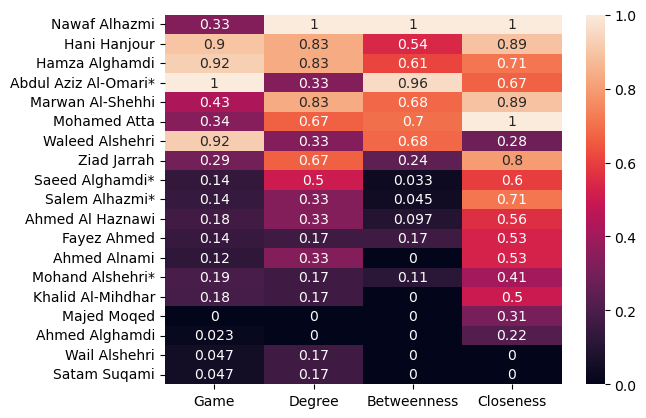

In [248]:
sns.heatmap(norm_centr_vals.loc[index_sort.index], annot=True);

Rank of players based on each centrality measure

In [200]:
game_sort = pd.Series(nodes_game_dict).sort_values(ascending=False).index
deg_sort = pd.Series(node_deg_dict).sort_values(ascending=False).index
btw_sort = pd.Series(node_btw_dict).sort_values(ascending=False).index
cls_sort = pd.Series(node_close_dict).sort_values(ascending=False).index

players_rank = pd.DataFrame({'Game':game_sort,
                             'Degree':deg_sort,
                             'Betweenness':btw_sort,
                             'Closeness':cls_sort})


,Game,Degree,Betweenness,Closeness
0,Abdul Aziz Al-Omari*,Nawaf Alhazmi,Nawaf Alhazmi,Mohamed Atta
1,Hamza Alghamdi,Hani Hanjour,Abdul Aziz Al-Omari*,Nawaf Alhazmi
2,Waleed Alshehri,Hamza Alghamdi,Mohamed Atta,Hani Hanjour
3,Hani Hanjour,Marwan Al-Shehhi,Marwan Al-Shehhi,Marwan Al-Shehhi
4,Marwan Al-Shehhi,Ziad Jarrah,Waleed Alshehri,Ziad Jarrah
5,Mohamed Atta,Mohamed Atta,Hamza Alghamdi,Hamza Alghamdi
6,Nawaf Alhazmi,Saeed Alghamdi*,Hani Hanjour,Salem Alhazmi*
7,Ziad Jarrah,Ahmed Alnami,Ziad Jarrah,Abdul Aziz Al-Omari*
8,Mohand Alshehri*,Ahmed Al Haznawi,Fayez Ahmed,Saeed Alghamdi*
9,Khalid Al-Mihdhar,Salem Alhazmi*,Mohand Alshehri*,Ahmed Al Haznawi


Common names in the top 5 of both centrality types of measures

In [214]:
set([*game_sort[:6], *deg_sort[:12], *btw_sort[:6], *cls_sort[:8]])

{'Abdul Aziz Al-Omari*',
 'Ahmed Al Haznawi',
 'Ahmed Alnami',
 'Hamza Alghamdi',
 'Hani Hanjour',
 'Marwan Al-Shehhi',
 'Mohamed Atta',
 'Nawaf Alhazmi',
 'Saeed Alghamdi*',
 'Salem Alhazmi*',
 'Waleed Alshehri',
 'Ziad Jarrah'}

## References
[1] Lindelauf, R.H., Hamers, H. and Husslage, B. (2011) ‘Game theoretic centrality analysis of terrorist networks: The cases of jemaah islamiyah and Al Qaeda’, SSRN Electronic Journal [Preprint]. doi:10.2139/ssrn.1934726. 